<a href="https://colab.research.google.com/github/MathMachado/Python_RFB/blob/master/3DP_Feature%20Engineering_Fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3DP_FEATURE ENGINEERING - FASE 1

## Carrega as biblotecas:

In [0]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Carrega o dataframe
* A seguir, os principais atributos/features do dataframe:
    * **PassengerID**: ID do passageiro;
    * **Survived**: Indicador, sendo 1= Passageiro sobreviveu e 0= Passageiro morreu;
    * **Pclass**: Classe em que o passageiro viaja (1 classe, 2 classe, 3 classe, etc);
    * **Age**: Idade do Passageiro;
    * **SibSp**: Número de parentes a bordo (esposa, irmãos, pais e etc);
    * **Parch**: Número de pais/crianças a bordo;
    * **Fare**: Valor pago pela viagem;
    * **Cabin**: Cabine do Passageiro;
    * **Embarked**: A porta pelo qual o Passageiro embarcou.
    * **Name**: Nome do Passageiro;
    * **Sex**: Sexo do Passageiro.

In [0]:
url_train= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/master/Dataframes/Titanic_With_MV.csv?token=AGDJQ66XY32B4N6URG7PZ7S5NUVTQ'
url_test= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/master/Dataframes/Titanic_test.csv?token=AGDJQ6YWHQQ2BFQ3VBPVJMS5NUVXG'

# Carrega os dataframes de treinamento e teste e define 'PassengerId' como chave
df_train= pd.read_csv(url_train, index_col='PassengerId')
df_test= pd.read_csv(url_test, index_col='PassengerId')

# Faz uma cópia dos dados originais da variável resposta 'Survived'
df_train_Survived = df_train["Survived"].copy()

# merge train and test
df = df_train.append(df_test, sort= False)

## Entendendo o dataframe

In [6]:
# Número de linhas/instâncias do dataframe
df.shape

(1309, 11)

In [7]:
# Colunas do dataframe
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Informações gerais sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


O que você diria do output acima? Que informações você consegue abstrair disso?

In [9]:
# Visualizando parte do dataframe
df.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Deletar atributos/features que não são de interesse
* Eu não vejo, a priori, valor na variável 'Ticket'. Portanto, vou deletá-la do dataframe.

In [10]:
df = df.drop(['Ticket'], axis=1) # axis= 1 indica que se trata de uma operação na coluna do dataframe. Lembre-se: axis= 0 indica operação nas linhas do dataframe.
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S


Observe que a coluna 'Ticket' foi de fato deletada do dataframe.

A seguir, crio a variável 'Survived2' para ajudar no entendimento dos dados:

In [12]:
df['Survived2'] = df['Survived']
df['Survived2'] = df['Survived2'].map({0:'Died',1:'Survived'})
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived2
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Died
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Survived
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Survived
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Survived
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Died
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,Died
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,Died
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,Died
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S,Survived


## Entendendo as variáveis Originais do Dataframe
* Vamos verificar como as variáveis estão preenchidas a fim de corrigir possíveis problemas de preenchimento.

A função a seguir nos ajudará com o Data Visualization, cruzando a variável-resposta 'Survived' com qualquer outra passada à função:

In [0]:
def Avalia_Taxa_Sobrevivencia(df, column):
    title_xt = pd.crosstab(df[column], df['Survived2'])
    print(pd.crosstab(df[column], df['Survived2'], margins=True))
    title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
    
    title_xt_pct.plot(kind='bar', stacked=True, title='Taxa de Sobrevivência dos Passageiros', 
                      color= ['r', 'g'])
    plt.xlabel(column)
    plt.ylabel('Taxa de Sobrevivência')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
    plt.show()

def Catplot_Graph(x, y, hue= 'Survived2', col= None):
    plt.rcdefaults()
    g= sns.catplot(x= x, y= y, hue= hue, palette={'Died':'red','Survived':'blue'}, col= col, data=df, kind= 'bar', height=4, aspect=.7)
    plt.show()

### Variável 'Sex'

Vamos avaliar o preenchimento desta variável

In [15]:
df.Sex.value_counts()

male      833
female    458
m           4
M           3
f           2
MALE        1
W           1
Men         1
w           1
mALE        1
F           1
fEMALE      1
Female      1
Woman       1
Name: Sex, dtype: int64

Qual sua opinião sobre esse preenchimento?

Algum problema?

Aqui temos vários problemas... Olhando para estes resultados, você concorda que 'male', 'm', 'MALE', M', 'mALE' e 'Men' se trata da mesma informação?

Da mesma forma, 'female', 'f', 'F', 'Female', 'fEMALE', 'Woman', 'w' e 'W' também se trata da mesma informação?

Então, vamos fazer o seguinte:

Toda vez que eu encontrar um desses valores: ['m', 'MALE', 'M', 'mALE', 'Men'], vou substituir por 'male'; Toda vez que eu encontrar um desses valores: ['f', 'F', 'Female', 'fEMALE', 'Woman', 'w', 'W'], vou substituit por 'female'. O comando a seguir faz estas substituições:

Definindo o dicionário para fazermos as substituições dos valores inconsistentes:

In [16]:
dSex= {}
dSex.update(dict.fromkeys(['m', 'MALE', 'M', 'mALE', 'Men', 'male'], "male"))
dSex.update(dict.fromkeys(['f', 'F', 'Female', 'fEMALE', 'Woman', 'w', 'W', 'female'], 'female'))
dSex

{'F': 'female',
 'Female': 'female',
 'M': 'male',
 'MALE': 'male',
 'Men': 'male',
 'W': 'female',
 'Woman': 'female',
 'f': 'female',
 'fEMALE': 'female',
 'female': 'female',
 'm': 'male',
 'mALE': 'male',
 'male': 'male',
 'w': 'female'}

Aplica a transformação:

In [17]:
df['Sex2']= df['Sex'].map(dSex)
df.Sex2.value_counts()

male      843
female    466
Name: Sex2, dtype: int64

Qual a conclusão? Este preenchimento faz mais sentido que o anterior?

**Atenção:** Os comandos abaixo são uma alternativa ao map() aplicado anteriormente para corrigir os atributos da variável 'Sex':

```
df['Sex2'] = df['Sex'].replace(['m', 'MALE', 'M', 'mALE', 'Men'], 'male')
df['Sex3'] = df['Sex2'].replace(['f', 'F', 'Female', 'fEMALE', 'Woman', 'w', 'W'], 'female') 
df.Sex3.value_counts()
```

Ok, de fato corrigimos os problemas de preenchimento da variável 'Sex'. então, vamos renomear nossa variável para o que tínhamos antes:

In [18]:
# Deleta as variáveis 'Sex':
df= df.drop(columns= ['Sex'], axis= 1)

# Renomea a variável auxiliar 'Sex2' para 'Sex':
df= df.rename(columns= {'Sex2': 'Sex'})

# Mostra os dados:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived2,Sex
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,Died,male
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,Survived,female
3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,S,Survived,female
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,S,Survived,female
5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,S,Died,male


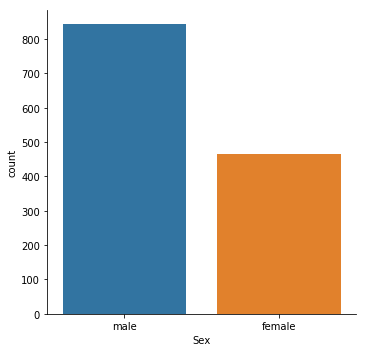

In [19]:
sns.catplot(x="Sex", kind="count", data=df)

### Variável 'Cabin'
* No caso da variável 'Cabin', vamos construir as variáveis 'Deck' e 'Seat'

In [20]:
set(df['Cabin'])

{'A10',
 'A11',
 'A14',
 'A16',
 'A18',
 'A19',
 'A20',
 'A21',
 'A23',
 'A24',
 'A26',
 'A29',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'A9',
 'B10',
 'B101',
 'B102',
 'B11',
 'B18',
 'B19',
 'B20',
 'B22',
 'B24',
 'B26',
 'B28',
 'B3',
 'B30',
 'B35',
 'B36',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B45',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B52 B54 B56',
 'B57 B59 B63 B66',
 'B58 B60',
 'B61',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C105',
 'C106',
 'C110',
 'C111',
 'C116',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C130',
 'C132',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C28',
 'C30',
 'C31',
 'C32',
 'C39',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C51',
 'C52',
 'C53',
 'C54',
 'C55 C57',
 'C6',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C80',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C89',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C97',
 'C

Como podemos ver, trata-se de uma variável categórica com vários níveis. Portanto, vamos capturar somente a primeira letra da variável 'Cabin'. Para tal, vamos utilizar a função slice().

> slice() - Get substring from a given string using slice object;

A seguir, capturamos a primeira letra da variável 'Cabin':

In [21]:
# definindo a variável 'Deck' que representará a primeira letra da variável 'Cabin'
df["Deck"] = df["Cabin"].str.slice(0,1)
df.Deck.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck, dtype: int64

A seguir, vamos extrair a parte numérica da variável 'Cabin' usando Expressões Regulares:

In [0]:
# Import the library Regular Expressions
import re

In [23]:
# Primeiramente, usamos a função split() para separar o conteúdo da variável em colunas: 
new = df["Cabin"].str.split(" ", n = 3, expand = True) 
new.head()

,0,1,2,3
PassengerId,,,,
1,NaN,NaN,NaN,NaN
2,C85,None,None,None
3,NaN,NaN,NaN,NaN
4,C123,None,None,None
5,NaN,NaN,NaN,NaN


Observe acima que o comando gera quantos splits da variável eu quiser. No entanto, por simplicidade, me interessa somente o primeiro split.

Agora, vou extrair o número do assento usando Expressões Regulares:

In [24]:
new2= new[0].str.extract('(\d+)')
new2.head()

,0
PassengerId,
1,NaN
2,85
3,NaN
4,123
5,NaN


Por fim, vou carregar esta informação ao dataframe df:

In [25]:
df["Seat"]= new2
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived2,Sex,Deck,Seat
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,Died,male,NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,Survived,female,C,85
3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,S,Survived,female,NaN,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,S,Survived,female,C,123
5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,S,Died,male,NaN,NaN


Por fim, excluir a variável 'Cabin':

In [0]:
df= df.drop(columns= ["Cabin"], axis=1, errors="ignore")

### Variável 'Embarked'

In [27]:
df.Deck.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck, dtype: int64

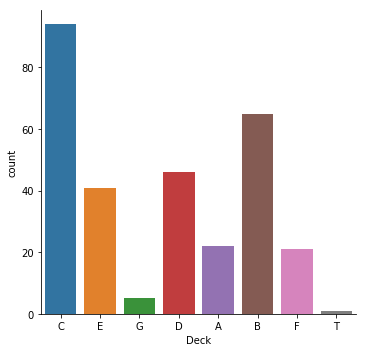

In [28]:
sns.catplot(x="Deck", kind="count", data=df)

Não vejo problemas com esta variável. Vamos em frente...

### Variável 'Pclass'

In [29]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

Algum problema com esta variável?

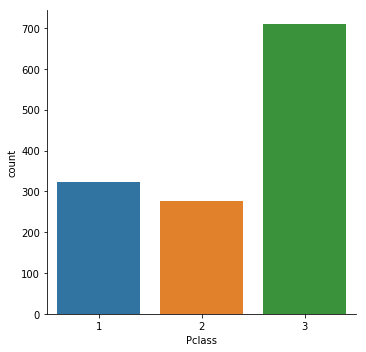

In [30]:
sns.catplot(x="Pclass", kind="count", data=df)

### Variável 'Parch'

In [31]:
df.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

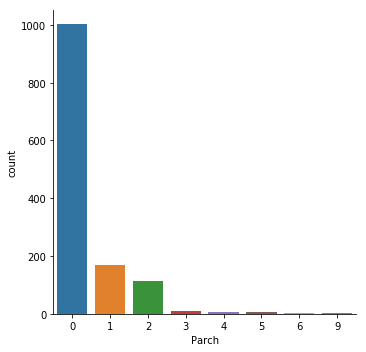

In [32]:
sns.catplot(x="Parch", kind="count", data=df)

### Variável 'SibSp'

In [33]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

* Algum problema?

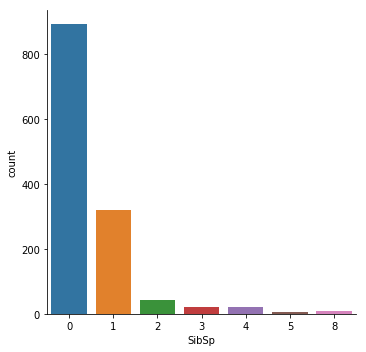

In [34]:
sns.catplot(x="SibSp", kind="count", data=df)

### Variável 'Fare'

Transformações: arredondar variável Fare.

In [0]:
df['Fare']= round(df['Fare'], 0)

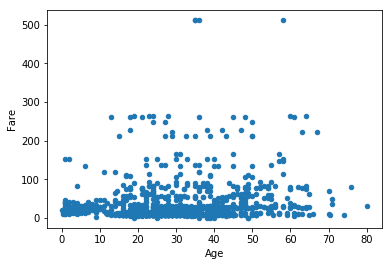

In [36]:
df.plot.scatter('Age','Fare')

### Variável 'Age'

Transformações: arredondar variável Fare.

In [0]:
df['Age']= round(df['Age'], 0)

## Derivar outros atributos/features

### Variável 'MV_Age':

In [38]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Survived2,Sex,Deck,Seat
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.0,S,Died,male,NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.0,C,Survived,female,C,85
3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,8.0,S,Survived,female,NaN,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.0,S,Survived,female,C,123
5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,8.0,S,Died,male,NaN,NaN


Para construir a variável 'MV_Age', vamos utilizar a função pd.isna(). Por exemplo, o comando abaixo verifica se cada linha/observação da variável 'Age' é um NaN.

In [39]:
df['Age'].isna().sum()

263

A seguir, criamos uma variável auxiliar intitulada 'MV_AUX', que receberá 'True', caso 'Age' seja um valor válido e 'False' caso 'Age' seja NaN.

Veja abaixo:

In [40]:
df['MV_AUX']= df['Age'].isna()
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Survived2,Sex,Deck,Seat,MV_AUX
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.0,S,Died,male,NaN,NaN,False
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.0,C,Survived,female,C,85,False
3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,8.0,S,Survived,female,NaN,NaN,False
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.0,S,Survived,female,C,123,False
5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,8.0,S,Died,male,NaN,NaN,False


In [41]:
# Adiciona a nova coluna baseado no dicionario 
df['MV_Age'] = df['MV_AUX'].map({True: 1, False: 0})
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Survived2,Sex,Deck,Seat,MV_AUX,MV_Age
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.0,S,Died,male,NaN,NaN,False,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.0,C,Survived,female,C,85,False,0
3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,8.0,S,Survived,female,NaN,NaN,False,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.0,S,Survived,female,C,123,False,0
5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,8.0,S,Died,male,NaN,NaN,False,0


Deleta a variável auxiliar 'MV_AUX':

In [0]:
df= df.drop(columns= ['MV_AUX'], axis=1)
df.head()

Qual a relação entre a variável 'MV_Age' e a variável-resposta?

Survived2  Died  Survived  All
MV_Age                        
0           424       290  714
1           125        52  177
All         549       342  891


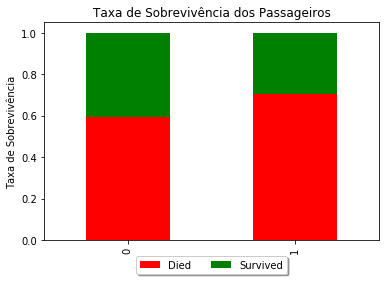

In [44]:
Avalia_Taxa_Sobrevivencia(df, 'MV_Age')

### Variável 'Age_Category'
* Construir a variável 'Age_Category' baseado na variável 'Age2'.

In [0]:
def Age_Category(age):
    if (age <= 1):
        return 'Baby'
    if (age <= 4):
        return 'Toddler'
    elif(age <= 12):
        return 'Child'
    elif (age <= 19):
        return 'Teenager'
    elif (age <= 30):
        return 'Adult'
    elif (age <= 50):
        return 'Middle_Aged'
    elif(age < 60):
        return 'Senior_Citizen'
    else:
        return 'Old'

In [0]:
df['Age_Category'] = df['Age'].map(Age_Category)

In [48]:
set(df['Age_Category']) # Esse comando mostra os NaN's da variável

{'Adult',
 'Baby',
 'Child',
 'Middle_Aged',
 'Old',
 'Senior_Citizen',
 'Teenager',
 'Toddler'}

### Variável 'Title'

* Para fins de Data Manipulation, vamos capturar o tratamento dos passageiros contido na variável 'Name'. Ou seja, 'Mr.', 'Mrs.', 'Miss' e etc...

> Fonte: As funções get_title e title_map foram extraídas de https://www.kaggle.com/tjsauer/titanic-survival-python-solution

In [49]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Survived2,Sex,Deck,Seat,MV_Age,Age_Category
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.0,S,Died,male,NaN,NaN,0,Adult
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.0,C,Survived,female,C,85,0,Middle_Aged
3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,8.0,S,Survived,female,NaN,NaN,0,Adult
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.0,S,Survived,female,C,123,0,Middle_Aged
5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,8.0,S,Died,male,NaN,NaN,0,Middle_Aged


In [0]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

def title_map(title):
    if title in ['Mr', 'Ms']:
        return 1
    elif title in ['Master']:
        return 2
    elif title in ['Ms','Mlle','Miss']:
        return 3
    elif title in ["Mme", "Ms", "Mrs"]:
        return 4
    elif title in ["Jonkheer", "Don", "Sir", "the Countess", "Dona", "Lady"]:
        return 5
    elif title in ["Capt", "Col", "Major", "Dr", "Rev"]:
        return 6
    else:
        return 7

Captura o tratamento dos passageiros:

In [51]:
df['Title'] = df['Name'].apply(get_title).apply(title_map)  
set(df['Title']) # Esse comando mostra os NaN's da variável

{1, 2, 3, 4, 5, 6}

Drop a coluna 'Name', pois não vamos mais precisar dela em nossas análises:

In [0]:
df= df.drop(columns= ["Name"], axis=1, errors="ignore")

Apresenta o conteúdo do dataframe:

In [53]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived2,Sex,Deck,Seat,MV_Age,Age_Category,Title
PassengerId,,,,,,,,,,,,,,
1,0.0,3,22.0,1,0,7.0,S,Died,male,NaN,NaN,0,Adult,1
2,1.0,1,38.0,1,0,71.0,C,Survived,female,C,85,0,Middle_Aged,4
3,1.0,3,26.0,0,0,8.0,S,Survived,female,NaN,NaN,0,Adult,3
4,1.0,1,35.0,1,0,53.0,S,Survived,female,C,123,0,Middle_Aged,4
5,0.0,3,35.0,0,0,8.0,S,Died,male,NaN,NaN,0,Middle_Aged,1
6,0.0,3,NaN,0,0,8.0,Q,Died,male,NaN,NaN,1,Old,1
7,0.0,1,54.0,0,0,52.0,S,Died,male,E,46,0,Senior_Citizen,1
8,0.0,3,2.0,3,1,21.0,S,Died,male,NaN,NaN,0,Toddler,2
9,1.0,3,27.0,0,2,11.0,S,Survived,female,NaN,NaN,0,Adult,4


### Variável 'Family_Size'
* As variáveis SibSp e Parch estão relacionadas ao grupo familiar. Portanto, vamos criar a variável 'Family_Size', da seguinte forma:

In [0]:
df['Family_Size']= df['SibSp']+df['Parch']+1

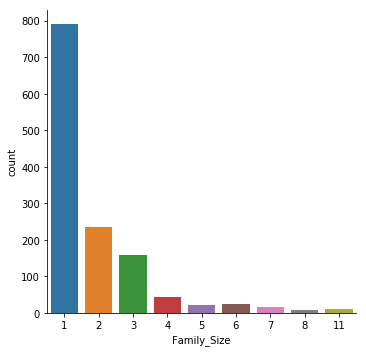

In [56]:
sns.catplot(x="Family_Size", kind="count", data=df)

In [57]:
set(df['Family_Size']) # Esse comando mostra os NaN's da variável

{1, 2, 3, 4, 5, 6, 7, 8, 11}

# Conclusão

In [58]:
df.head(50)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived2,Sex,Deck,Seat,MV_Age,Age_Category,Title,Family_Size
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,22.0,1,0,7.0,S,Died,male,NaN,NaN,0,Adult,1,2
2,1.0,1,38.0,1,0,71.0,C,Survived,female,C,85,0,Middle_Aged,4,2
3,1.0,3,26.0,0,0,8.0,S,Survived,female,NaN,NaN,0,Adult,3,1
4,1.0,1,35.0,1,0,53.0,S,Survived,female,C,123,0,Middle_Aged,4,2
5,0.0,3,35.0,0,0,8.0,S,Died,male,NaN,NaN,0,Middle_Aged,1,1
6,0.0,3,NaN,0,0,8.0,Q,Died,male,NaN,NaN,1,Old,1,1
7,0.0,1,54.0,0,0,52.0,S,Died,male,E,46,0,Senior_Citizen,1,1
8,0.0,3,2.0,3,1,21.0,S,Died,male,NaN,NaN,0,Toddler,2,5
9,1.0,3,27.0,0,2,11.0,S,Survived,female,NaN,NaN,0,Adult,4,3


# Exercícios
* Para cada dataframe a seguir, avalie o que necessita ser feito em termos de qualidade de dados.

## Exercício 1 - Predict Breast Cancer
Veja esses exercícios: https://necromuralist.github.io/data_science/posts/predicting-cancer/

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X= cancer['data']
y= cancer['target']

df_cancer = pd.DataFrame(np.c_[X, y], columns= np.append(cancer['feature_names'], ['target']))
df_cancer['target'] = df_cancer['target'].map({0: 'malign', 1: 'benign'})
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malign


## Exercício 2 - Predict Boston Housing Price 
Tá aqui o exemplo: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [0]:
from sklearn.datasets import load_boston

boston = load_boston()
X= boston['data']
y= boston['target']

df_boston = pd.DataFrame(np.c_[X, y], columns= np.append(boston['feature_names'], ['target']))
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exercícios 3 - Diabetes


In [0]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X= diabetes['data']
y= diabetes['target']

df_diabetes = pd.DataFrame(np.c_[X, y], columns= np.append(diabetes['feature_names'], ['target']))
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
